In [ ]:
pip install numpy pandas scikit-learn seaborn matplotlib

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
# Load the Titanic dataset from seaborn
titanic = sns.load_dataset('titanic')

In [ ]:
# Display the first 5 rows
print(titanic.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


In [ ]:
# Display all column names in the Titanic dataset
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'class', 'who', 'adult_male', 'deck', 'embark_town',
       'alive', 'alone'],
      dtype='object')


In [ ]:
# Drop unnecessary columns
titanic = titanic.drop(['deck', 'embark_town', 'alive', 'class', 'who', 'adult_male'], axis=1)

In [ ]:
print(titanic.columns)

Index(['survived', 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare',
       'embarked', 'alone'],
      dtype='object')


In [ ]:
# Handle missing values
titanic['age'].fillna(titanic['age'].median(), inplace=True)

<ipython-input-9-2f40074b235e>:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['age'].fillna(titanic['age'].median(), inplace=True)


In [ ]:
titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)

<ipython-input-10-7fc35df1c408>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic['embarked'].fillna(titanic['embarked'].mode()[0], inplace=True)


In [ ]:
# Convert categorical features to numeric
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [ ]:
print(titanic.head())

   survived  pclass  sex   age  sibsp  parch     fare  embarked  alone
0         0       3    0  22.0      1      0   7.2500         2  False
1         1       1    1  38.0      1      0  71.2833         0  False
2         1       3    1  26.0      0      0   7.9250         2   True
3         1       1    1  35.0      1      0  53.1000         2  False
4         0       3    0  35.0      0      0   8.0500         2   True


In [ ]:
# Define the input features and target variable
X = titanic[['pclass', 'sex', 'age', 'fare', 'embarked']]
y = titanic['survived']

In [ ]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Initialize and train the Logistic Regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
# Display model coefficients
print("Model Coefficients:", model.coef_)

Model Coefficients: [[-9.55166687e-01  2.37424351e+00 -2.72537823e-02  6.54495268e-04
  -3.49911479e-01]]


In [ ]:
# Predict the survival on test data
y_pred = model.predict(X_test)

In [ ]:
# Display first few predictions
print("Predicted:", y_pred[:10])
print("Actual:", y_test[:10].values)

Predicted: [0 0 0 1 1 1 1 0 1 1]
Actual: [1 0 0 1 1 1 1 0 1 1]


In [ ]:
# Calculate and print accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.48%


In [ ]:
# Generate and display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

Confusion Matrix:
 [[131  26]
 [ 29  82]]


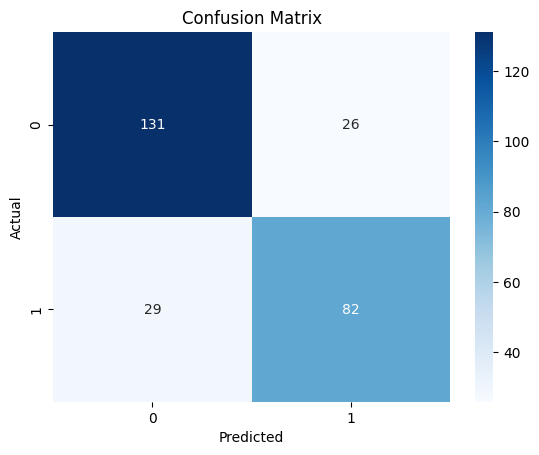

In [ ]:
# Plot the confusion matrix
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt='g')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


**Precision:** How many of the predicted positive cases were correct?



**Recall:** How many of the actual positive cases were correctly identified?

**F1-Score:** Harmonic mean of precision and recall, useful for imbalanced datasets.


**Support:** The number of true instances for each class in the dataset.